## Monte Carlo simulation of a simple experiment using tools from the `stats` sub-module of `scipy`

<b>Question:</b> I flip a fair coin 100 times.  What is the probability that I get 60 or more "heads"?

One way to answer this question is to use the known properties of the binomial distribution (see the end of this notebook), but I want to get the answer performing a Monte Carlo simulation that uses tools from the `stats` submodule of `scipy`.

Marty Ligare, August 2020

In [2]:
import numpy as np
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook
        
# M.L. modification of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
plt.style.use('classic')
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', autolayout = True)  # Adjusts supblot params for new size

#### Simulating coin flips

I am going to generate 100 random 0's and 1's, and let 1 represent a "heads" and 0 represent a "tails."

In [4]:
n_flips = 100 # Number of coin flips
data = stats.randint.rvs(0, 2, size=n_flips)
print(data)

[1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0
 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1]


I can count the "heads" by summing the array `data`. 

In [5]:
n_heads = np.sum(data)
print(n_heads)

55


#### Simulating many trials of 100 coin flips, to see how many times I get 60 or more heads

In [6]:
n_expts = 10000               # Number of experiments to simulate
results = np.zeros(n_expts)   # Create array for results of simulations

for i in range(n_expts):
    results[i] = np.sum(stats.randint.rvs(0, 2, size=n_flips))

#### Histogram of results

<IPython.core.display.Javascript object>


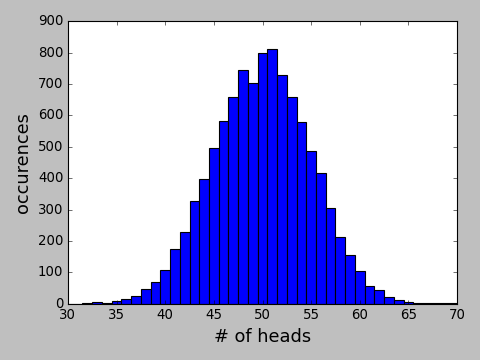

In [7]:
nbins = 101
low = -.5
high = 100.5

plt.figure()
plt.xlabel("# of heads")
plt.ylabel("occurences")
plt.hist(results, nbins, [low,high])
plt.xlim(30,70);

#### Find average number of "heads"; should be close to 50

In [8]:
np.mean(results)

49.9336

#### Count experiments which give 60 or more "heads," Version I

In [9]:
success = 0
for i in range(len(results)):
    if results[i] > 59:
        success += 1

In [11]:
print("number of trials with 60 or more heads =", success, ", probability =",success/n_expts)

number of trials with 60 or more heads = 249 , probability = 0.0249


#### Count experiments which give 60 or more "heads," Version II

In [10]:
sum(1 if i>59 else 0 for i in results)

249

## Using properties of binomial distribution to analyze the same experiment

The probablity of obtaining 60 or more heads is 

$$1 - \mbox{probability of obtaining 59 or fewer  heads} = 1 - C_{DF}(59)$$  

In [12]:
p = 0.5    # probability of getting a "head" in a single trial
n = 100    # number of trials

print("probability =", 1 - stats.binom.cdf(59, n, p))

probability = 0.02844396682049044


This result is consistent with results of the Monte Carlo simulation.

#### Version information

+ %version_information is an IPython magic extension for showing version information for dependency modules in a notebook; 

+ See `https://github.com/jrjohansson/version_information`

+ `%version_information` is available on Bucknell computers on the linux network.  You can easily install it on
any computer.

In [13]:
%load_ext version_information

In [14]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 3.10.0 1062.9.1.el7.x86_64 x86_64 with centos 7.7.1908 Core
numpy 1.18.5
scipy 1.5.2
matplotlib 3.3.0
Fri Aug 07 14:23:33 2020 EDT